# IBM Employee Attrition Dataset: Explorative Data Analyis (EDA)

### First we need to import some modules

In [1]:
import os 
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

###  read the IBM Employee Attition Dataset 

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pprint(list(data.columns))
data.head()


['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### numerical and categorical variables:
most of the variables are numerical - either by by their "own nature" or by being already transformed to an integer (ordinal) scale. Others are still of categorical, i.e. string type - we can identify those by checking for "dtype == object" 

In [3]:
categorical_variables = [col for col in data.columns if data.loc[:, col].dtype == "object"]
print(categorical_variables)
data.loc[:, categorical_variables].head()

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


as we can see, many of the categorical (object type) variables are of boolean nature. we can transform these onto oridnal (0/1) variables

In [4]:
boolean_variables = [
    "Attrition",
    "Gender",
    "Over18",
    "OverTime"
]
for var in boolean_variables:
    data.loc[:, var] = pd.factorize(data.loc[:, var])[0]

In [5]:
pd.factorize(data.loc[:, var])

(array([0, 1, 0, ..., 0, 1, 1]), Int64Index([0, 1], dtype='int64'))

in the case of BusinessTravel we can map the values "Non-Travel", "Travel_Rarely", "Travel-Frequently" to the ordinal scale 0,1,2:

In [6]:
data.BusinessTravel = data.BusinessTravel.replace({
    "Non-Travel": 0, 
    "Travel_Rarely": 1,
    "Travel_Frequently": 2}
    )

### Now we can hava a look at the correlation matrix

In [7]:
correlation = data.corr()
#correlation['OverTime'].sort_values()
correlation

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,-0.011807,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,-0.127006,0.056652,-0.077924,0.031373,NaN,0.010577,0.103369,-0.029453,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,-0.011807,-0.127006,1.000000,-0.015539,-0.009696,-0.008670,NaN,-0.018538,-0.011310,-0.044896,...,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,0.056652,-0.015539,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.077924,-0.009696,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,-0.008670,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,0.010577,-0.018538,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.103369,-0.011310,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,-0.029453,-0.044896,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,...,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

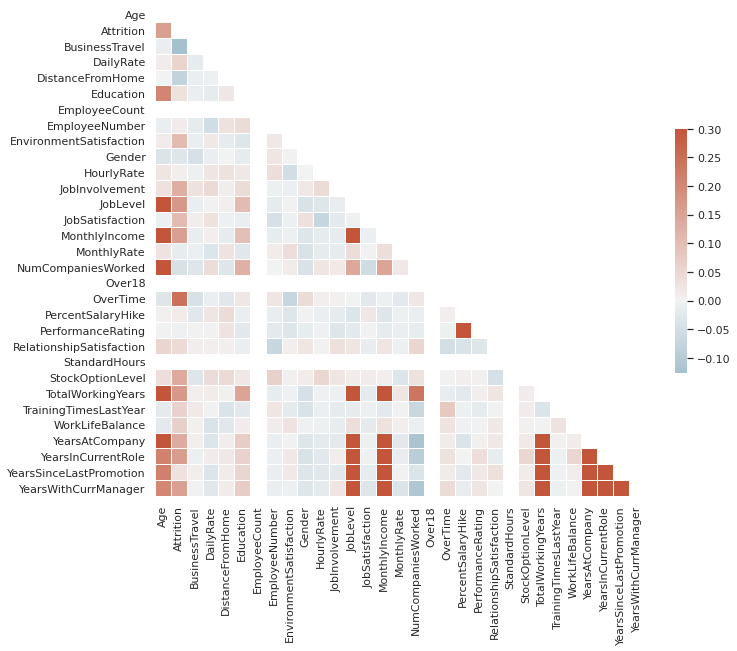

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## linear regression for Attrition
let's now try to run a linear regression on attrition

In [9]:
import sklearn.linear_model

numerical_variables = [col for col in data.columns if data.loc[:, col].dtype != "object"]
model = sklearn.linear_model.LogisticRegression()
y = data["Attrition"]
X = data.loc[:, numerical_variables].drop("Attrition", axis=1)
feature_names = X.columns
model.fit(X=X, y=y)

/mnt/c/Users/maximilian.kurthen/OneDrive - b.telligent/Projects/2021_01_SpringerFachbuch/caus_inf_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
most_important_features = np.abs(model.coef_[0]).argsort()[::-1]
feature_names[most_important_features]

#model.coef_[most_important_features]
#most_important_features

Index(['DistanceFromHome', 'Age', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'OverTime',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'StockOptionLevel',
       'YearsSinceLastPromotion', 'JobInvolvement', 'StandardHours',
       'TrainingTimesLastYear', 'BusinessTravel', 'RelationshipSatisfaction',
       'PercentSalaryHike', 'WorkLifeBalance', 'HourlyRate', 'JobLevel',
       'Gender', 'DailyRate', 'PerformanceRating', 'Education',
       'EmployeeNumber', 'EmployeeCount', 'MonthlyIncome', 'MonthlyRate',
       'Over18'],
      dtype='object')

In [11]:
print("accuracy on training data:")
np.abs(model.predict(X) == y).sum() / len(y)

accuracy on training data:


0.8394557823129252